In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("C:/Users/tarun/Weekdays 10;AM BAtch python/Class.ipynb/Titanic dataset.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Explore the dataset

In [5]:
data.shape
print('Rows: ',data.shape[0])
print('columns: ',data.shape[1])

Rows:  891
columns:  12


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [8]:
data.describe(include=object).T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


In [9]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


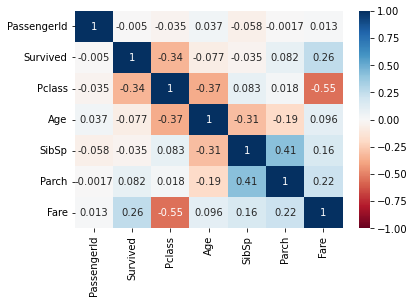

In [10]:
sns.heatmap(data.corr(),vmax=1,vmin=-1,cmap='RdBu',annot=True)
plt.show()

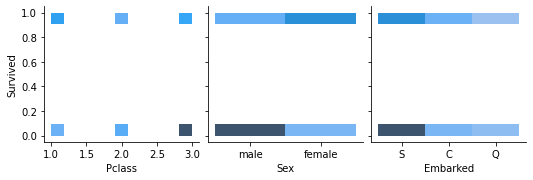

In [11]:
sns.pairplot(y_vars=['Survived'],x_vars=['Pclass','Sex','Embarked'],kind='hist',data=data)
plt.show()

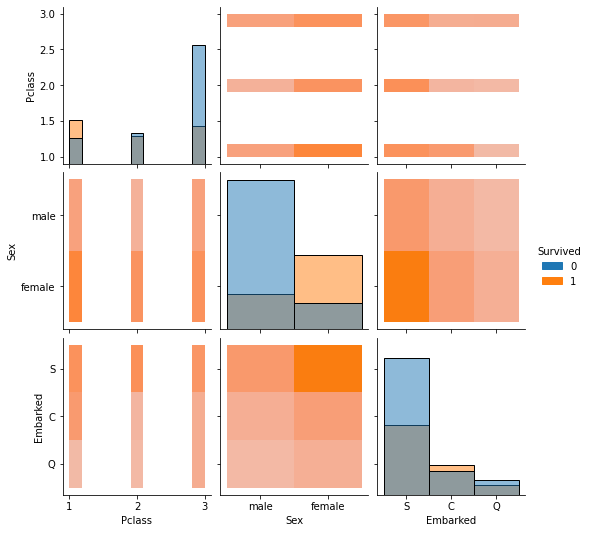

In [12]:
sns.pairplot(vars=['Pclass','Sex','Embarked'],hue='Survived',kind='hist',data=data)
plt.show()

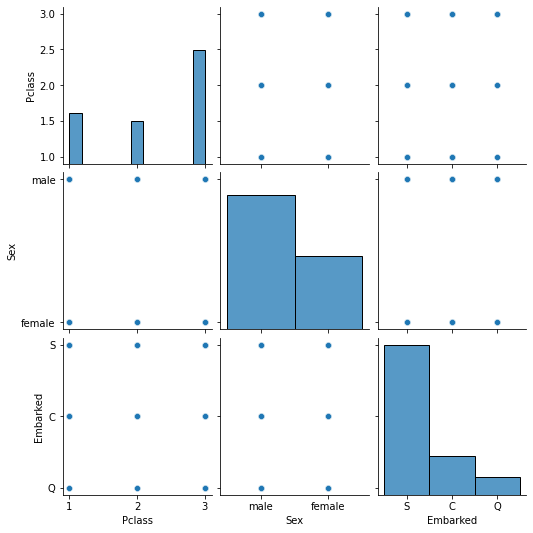

In [13]:
sns.pairplot(vars=['Pclass','Sex','Embarked'],data=data)
plt.show()

In [14]:
## DATA analysis on survived

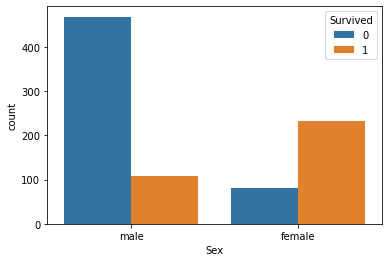

In [15]:
sns.countplot(data['Sex'],hue=data['Survived'])
data.groupby(by=['Sex','Survived'])['Survived'].count()
plt.show()

In [16]:
data_sex=data.groupby(by=['Sex','Survived'])['Survived'].count()


In [17]:
data_sex

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [18]:
print('Females Survived %.2f%%'%((data_sex['female'][1]/(data_sex['female'][0]+data_sex['female'][1])*100)))
print('male Survived %.2f%%'%((data_sex['male'][1]/(data_sex['male'][0]+data_sex['male'][1])*100)))

Females Survived 74.20%
male Survived 18.89%


<AxesSubplot:xlabel='Pclass', ylabel='count'>

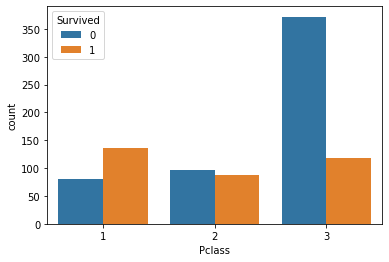

In [19]:
sns.countplot(data['Pclass'],hue=data['Survived'])

In [20]:
data_Pclass=data.groupby(by=['Pclass','Survived'])['Survived'].count()


In [21]:
data_Pclass

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [22]:
print('1st class Survived %.2f%%'%((data_Pclass[1][1]/(data_Pclass[1][0]+data_Pclass[1][1])*100)))
print('2st class Survived %.2f%%'%((data_Pclass[2][1]/(data_Pclass[2][0]+data_Pclass[2][1])*100)))
print('3st class Survived %.2f%%'%((data_Pclass[3][1]/(data_Pclass[3][0]+data_Pclass[3][1])*100)))



1st class Survived 62.96%
2st class Survived 47.28%
3st class Survived 24.24%


In [23]:
data['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [24]:
def age_category(age):
    if age<=12:
        return 'Children'
    elif age>12 and age<=18:
        return 'Teenage'
    elif age>18 and age<30:
        return "youth"
    elif age>30 and age<45:
        return 'Midage'
    elif age>45 and age<60:
        return 'oldage'
    else:
        return 'senior'

In [25]:
data['Age category']=data['Age'].apply(age_category)

In [26]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,youth
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Midage
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,youth
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Midage
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Midage


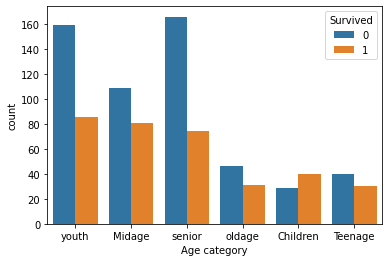

In [27]:
sns.countplot(data['Age category'],hue=data['Survived'])
plt.show()

In [28]:
observed=pd.crosstab(data['Age category'],data['Survived'])

In [29]:
from scipy.stats import chi2_contingency

In [30]:
# H0: the Survived is independend of Age category
# H1: thesurvied  dependent on Age category
chi,p,dof,expected = chi2_contingency(observed)
print('chi sq: ',chi)
print('p-score: ',p)

if p<0.05:
    print('Accept The H1')
else:
    print('Accept the H0')

chi sq:  20.250361003917092
p-score:  0.0011214860323133387
Accept The H1


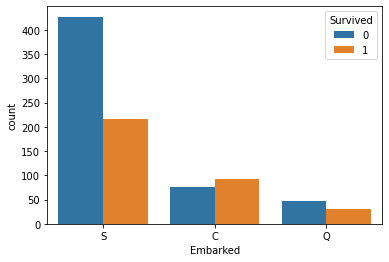

In [31]:
sns.countplot(data['Embarked'],hue=data['Survived'])
plt.show()

In [32]:
# Does the Survied Depends upon fare Price??

In [33]:
fare_surv = data[data['Survived']==1]['Fare']
fare_nsurv = data[data['Survived']==0]['Fare']

In [34]:
from statsmodels.stats.weightstats import ztest

In [35]:
# H0:There is no difference in fare of surv and fare of not surv
# H1:The two sample are differnt
Z_score,p_value = ztest(fare_surv,fare_nsurv)
print('Z-score: ',Z_score)
print('p-score: ',p_value)

if p_value<0.05:
    print('Accept The H1')
else:
    print('Accept the H0')

Z-score:  7.939191660871055
p-score:  2.035031103573989e-15
Accept The H1


# DATA PRE-PROCESSING

In [36]:
## Detect and treat the missing value

In [37]:
data.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             177
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          2
Age category      0
dtype: int64

In [38]:
((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)

Cabin           77.104377
Age             19.865320
Embarked         0.224467
PassengerId      0.000000
Survived         0.000000
Pclass           0.000000
Name             0.000000
Sex              0.000000
SibSp            0.000000
Parch            0.000000
Ticket           0.000000
Fare             0.000000
Age category     0.000000
dtype: float64

In [39]:
data[data['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age category
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,senior
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,senior
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,senior
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,senior
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,senior
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,senior
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,senior
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,senior
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,senior


In [40]:
data[data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age category
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Midage
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,senior


In [41]:
data.groupby(by=['Pclass','Embarked'])['Fare'].median()

Pclass  Embarked
1       C           78.2667
        Q           90.0000
        S           52.0000
2       C           24.0000
        Q           12.3500
        S           13.5000
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [42]:
data['Embarked']=np.where(data['Embarked'].isnull(),'C',data['Embarked'])

In [43]:
data.iloc[[61,829],:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age category
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,C,Midage
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,C,senior


In [44]:
data['Age'].median()

28.0

In [45]:
data['Age'].fillna(data['Age'].median(),inplace=True)

In [46]:
data[data['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age category


In [47]:
# we need to drop the cabin column because 77% data is missing

In [48]:
data.drop(columns=['Cabin'], inplace=True)

In [49]:
((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)

PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
Age             0.0
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Embarked        0.0
Age category    0.0
dtype: float64

# Detecting and treating the outliers

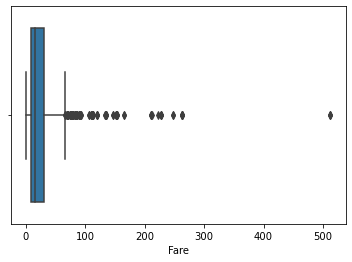

In [50]:
sns.boxplot(data['Fare'])
plt.show()

In [51]:
data[data['Fare']>500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age category
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C,Midage
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C,Midage
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C,Midage


In [52]:
# we will cap the values in fare to 95th percentile value
np.percentile(data['Fare'],95)

112.07915

In [53]:
ul=np.percentile(data['Fare'],95)

In [54]:
data['Fare']=np.where(data['Fare']>ul,ul,data['Fare'])

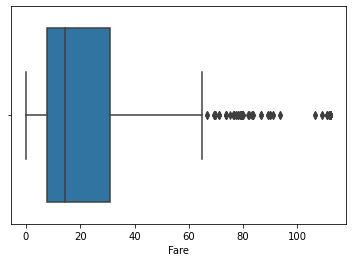

In [55]:
sns.boxplot(data['Fare'])
plt.show()

# Feature selection

In [56]:
## To avoid multicolinearity we need to remove Pclass

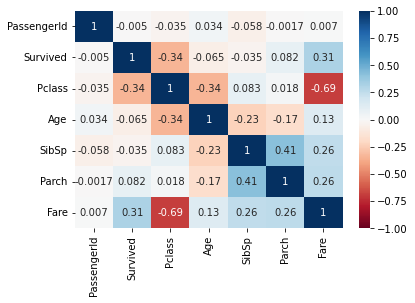

In [57]:
sns.heatmap(data.corr(),vmax=1,vmin=-1,cmap='RdBu',annot=True)
plt.show()

In [58]:
data.drop(columns=['PassengerId','Pclass','Name','Ticket','Age category'],inplace=True)

In [59]:
data.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,1,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,0,male,35.0,0,0,8.0500,S


# Feature Engineering 

In [61]:
data = pd.get_dummies(data, drop_first=True)

In [62]:
data.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,1,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,0,35.0,0,0,8.0500,1,0,1


# Feature scaling

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
sc = StandardScaler()

In [66]:
data_s= sc.fit_transform(data)

In [67]:
data_s

array([[-0.78927234, -0.56573646,  0.43279337, ...,  0.73769513,
        -0.30756234,  0.61930636],
       [ 1.2669898 ,  0.66386103,  0.43279337, ..., -1.35557354,
        -0.30756234, -1.61470971],
       [ 1.2669898 , -0.25833709, -0.4745452 , ..., -1.35557354,
        -0.30756234,  0.61930636],
       ...,
       [-0.78927234, -0.1046374 ,  0.43279337, ..., -1.35557354,
        -0.30756234,  0.61930636],
       [ 1.2669898 , -0.25833709, -0.4745452 , ...,  0.73769513,
        -0.30756234, -1.61470971],
       [-0.78927234,  0.20276197, -0.4745452 , ...,  0.73769513,
         3.25137334, -1.61470971]])

In [68]:
pd.DataFrame(data_s, columns=data.columns)

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,-0.789272,-0.565736,0.432793,-0.473674,-0.700836,0.737695,-0.307562,0.619306
1,1.266990,0.663861,0.432793,-0.473674,1.491434,-1.355574,-0.307562,-1.614710
2,1.266990,-0.258337,-0.474545,-0.473674,-0.677726,-1.355574,-0.307562,0.619306
3,1.266990,0.433312,0.432793,-0.473674,0.868903,-1.355574,-0.307562,0.619306
4,-0.789272,0.433312,-0.474545,-0.473674,-0.673447,0.737695,-0.307562,0.619306
...,...,...,...,...,...,...,...,...
886,-0.789272,-0.181487,-0.474545,-0.473674,-0.503976,0.737695,-0.307562,0.619306
887,1.266990,-0.796286,-0.474545,-0.473674,0.078042,-1.355574,-0.307562,0.619306
888,-0.789272,-0.104637,0.432793,2.008933,-0.146206,-1.355574,-0.307562,0.619306
889,1.266990,-0.258337,-0.474545,-0.473674,0.078042,0.737695,-0.307562,-1.614710


# Train Test Split

In [69]:
y=data['Survived']
x = data.drop(columns=['Survived'])

In [70]:
x

,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,1,0,1
1,38.0,1,0,71.2833,0,0,0
2,26.0,0,0,7.9250,0,0,1
3,35.0,1,0,53.1000,0,0,1
4,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...
886,27.0,0,0,13.0000,1,0,1
887,19.0,0,0,30.0000,0,0,1
888,28.0,1,2,23.4500,0,0,1
889,26.0,0,0,30.0000,1,0,0


In [71]:
from sklearn.model_selection import train_test_split

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y,train_size=0.8,random_state=2)

In [73]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(712, 7) (712,)
(179, 7) (179,)


# Logistic Regression Model

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
model_lr = LogisticRegression()

In [76]:
model_lr.fit(x_train,y_train)

LogisticRegression()

In [77]:
# ln(y/1-y) = b0 + b1X1 + b2X2 ....bnxn [sigmoid Function]
# Log loss function j = -min(yi*log(p(y^))+(1-yi)log(p(1-y^)))

In [78]:
model_lr.coef_

array([[-0.02535741, -0.41570464, -0.23754026,  0.0279269 , -2.51459833,
        -0.31471231, -0.29738   ]])

In [79]:
model_lr.intercept_

array([1.57111452])

# Hard Predictions

In [81]:
y_pred = model_lr.predict(x_test)

In [82]:
pd.DataFrame({'Actual Y':y_test,'Predicted Y':y_pred}).head(20)

,Actual Y,Predicted Y
90,0,0
736,0,0
48,0,0
783,0,0
404,0,1
884,0,0
865,1,1
796,1,1
819,0,0
75,0,0


In [83]:
# Validation

In [84]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,log_loss

In [85]:
def validation(test,pred):
    print('confusion Matrix:\n',confusion_matrix(test,pred))
    print('Acuracy:',accuracy_score(test,pred))
    print('Recall:',recall_score(test,pred))
    print('Precision:',precision_score(test,pred))
    print('F1 Score:',f1_score(test,pred))

In [ ]:
validation(y_test,y_pred)

# ROC curve

# Soft predictions

In [89]:
y_pred_soft = model_lr.predict_proba(x_test)

In [90]:
y_pred_soft[:,1]

array([0.14786854, 0.47208917, 0.13245002, 0.10094479, 0.73272709,
       0.15737183, 0.63917218, 0.68034191, 0.08035954, 0.15960657,
       0.14782407, 0.69858674, 0.08673938, 0.14729097, 0.74094274,
       0.86259676, 0.16266431, 0.18762695, 0.14470186, 0.15344911,
       0.1564847 , 0.14118669, 0.13812154, 0.6269415 , 0.94736324,
       0.47334297, 0.0763595 , 0.66935522, 0.73713563, 0.10116857,
       0.14471449, 0.72920688, 0.34626121, 0.64511744, 0.1170312 ,
       0.70030787, 0.38545584, 0.6304626 , 0.14503175, 0.13872557,
       0.18973708, 0.71916632, 0.09367689, 0.57144463, 0.77305057,
       0.63423668, 0.21423655, 0.20398743, 0.06827642, 0.69669357,
       0.1581139 , 0.12516569, 0.39059567, 0.08967103, 0.68659154,
       0.81384061, 0.92300835, 0.17329333, 0.16850543, 0.07169363,
       0.20845764, 0.24851991, 0.71443091, 0.21521555, 0.72818613,
       0.85011003, 0.22291783, 0.14066086, 0.71219134, 0.05214464,
       0.83297101, 0.18975511, 0.93146596, 0.19318428, 0.66643

In [91]:
pd.DataFrame({'Actual Y':y_test,'Predicted Y':y_pred,'pred Y Soft':y_pred_soft[:,1]}).head(20)

,Actual Y,Predicted Y,pred Y Soft
90,0,0,0.147869
736,0,0,0.472089
48,0,0,0.132450
783,0,0,0.100945
404,0,1,0.732727
884,0,0,0.157372
865,1,1,0.639172
796,1,1,0.680342
819,0,0,0.080360
75,0,0,0.159607


In [92]:
# Log loss function j =-min(yi*log(p(y^))+(1-yi)log(p(1-y^)))
log_loss(y_test,y_pred_soft[:,1])

0.47514807562680406

In [93]:
from sklearn.metrics import roc_auc_score,roc_curve

In [94]:
fpr,tpr,thres = roc_curve(y_test,y_pred_soft[:,1])

Area under the curve:  0.8270750988142292


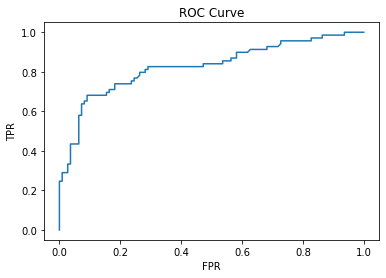

In [95]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
print('Area under the curve: ',roc_auc_score(y_test,y_pred_soft[:,1]))
plt.show()

# change the Threshold or classifier cutoff

In [97]:
threshold = 0.55
y_pred_new = (y_pred_soft[:,1]>=threshold).astype(int)


In [98]:
y_pred_new

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0])

In [99]:
validation(y_test,y_pred_new)

confusion Matrix:
 [[96 14]
 [22 47]]
Acuracy: 0.7988826815642458
Recall: 0.6811594202898551
Precision: 0.7704918032786885
F1 Score: 0.7230769230769231


# overfitting

In [100]:
y_pred_train = model_lr.predict(x_train)

In [101]:
validation(y_train,y_pred_train)

confusion Matrix:
 [[374  65]
 [ 85 188]]
Acuracy: 0.7893258426966292
Recall: 0.6886446886446886
Precision: 0.7430830039525692
F1 Score: 0.714828897338403


In [102]:
validation(y_test,y_pred)

confusion Matrix:
 [[94 16]
 [22 47]]
Acuracy: 0.7877094972067039
Recall: 0.6811594202898551
Precision: 0.746031746031746
F1 Score: 0.7121212121212122


# Regularization

# Ridge and Lasso

In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge,Lasso

In [104]:
params = {'C':[0.001,0.01,0.1,1,10,100,500]}

In [105]:
gscv = GridSearchCV(estimator=LogisticRegression(penalty='l2'),
                   param_grid=params,
                   scoring='accuracy',
                   verbose=3)

In [106]:
gscv.fit(x_train,y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END ...........................C=0.001;, score=0.671 total time=   0.0s
[CV 2/5] END ...........................C=0.001;, score=0.664 total time=   0.0s
[CV 3/5] END ...........................C=0.001;, score=0.669 total time=   0.0s
[CV 4/5] END ...........................C=0.001;, score=0.718 total time=   0.0s
[CV 5/5] END ...........................C=0.001;, score=0.711 total time=   0.0s
[CV 1/5] END ............................C=0.01;, score=0.713 total time=   0.0s
[CV 2/5] END ............................C=0.01;, score=0.713 total time=   0.0s
[CV 3/5] END ............................C=0.01;, score=0.704 total time=   0.0s
[CV 4/5] END ............................C=0.01;, score=0.725 total time=   0.0s
[CV 5/5] END ............................C=0.01;, score=0.754 total time=   0.0s
[CV 1/5] END .............................C=0.1;, score=0.804 total time=   0.0s
[CV 2/5] END .............................C=0.1;,

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 500]},
             scoring='accuracy', verbose=3)

In [107]:
gscv.best_score_

0.7892642568698907

In [108]:
gscv.best_params_ # c = 1/alpha

{'C': 0.1}

In [109]:
gscv = GridSearchCV(estimator=LogisticRegression(penalty='l1',solver='liblinear'),
                   param_grid=params,
                   scoring='accuracy',
                   verbose=3)

In [110]:
gscv.fit(x_train,y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END ...........................C=0.001;, score=0.671 total time=   0.0s
[CV 2/5] END ...........................C=0.001;, score=0.650 total time=   0.0s
[CV 3/5] END ...........................C=0.001;, score=0.648 total time=   0.0s
[CV 4/5] END ...........................C=0.001;, score=0.711 total time=   0.0s
[CV 5/5] END ...........................C=0.001;, score=0.662 total time=   0.0s
[CV 1/5] END ............................C=0.01;, score=0.678 total time=   0.0s
[CV 2/5] END ............................C=0.01;, score=0.664 total time=   0.0s
[CV 3/5] END ............................C=0.01;, score=0.648 total time=   0.0s
[CV 4/5] END ............................C=0.01;, score=0.718 total time=   0.0s
[CV 5/5] END ............................C=0.01;, score=0.697 total time=   0.0s
[CV 1/5] END .............................C=0.1;, score=0.790 total time=   0.0s
[CV 2/5] END .............................C=0.1;,

GridSearchCV(estimator=LogisticRegression(penalty='l1', solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 500]},
             scoring='accuracy', verbose=3)

In [111]:
gscv.best_score_

0.7850980005909582

In [112]:
gscv.best_params_

{'C': 0.1}

# Navie Bayes

In [113]:
from sklearn.naive_bayes import GaussianNB

In [114]:
model_nb = GaussianNB()

In [115]:
model_nb.fit(x_train,y_train)

GaussianNB()

In [116]:
y_pred_nb = model_nb.predict(x_test)

In [117]:
y_pred_nb

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [118]:
pd.DataFrame({'Actual Y':y_test,'Pred LR':y_pred,'Pred NB':y_pred_nb}).head(20)

,Actual Y,Pred LR,Pred NB
90,0,0,0
736,0,0,1
48,0,0,0
783,0,0,0
404,0,1,1
884,0,0,0
865,1,1,1
796,1,1,1
819,0,0,0
75,0,0,0


In [119]:
validation(y_test,y_pred_nb)

confusion Matrix:
 [[94 16]
 [21 48]]
Acuracy: 0.7932960893854749
Recall: 0.6956521739130435
Precision: 0.75
F1 Score: 0.7218045112781954


In [120]:
validation(y_test,y_pred)

confusion Matrix:
 [[94 16]
 [22 47]]
Acuracy: 0.7877094972067039
Recall: 0.6811594202898551
Precision: 0.746031746031746
F1 Score: 0.7121212121212122


In [121]:
# soft predictions
y_pred_nb_soft = model_nb.predict_proba(x_test)

In [122]:
y_pred_nb_soft[:,1]

array([7.67750443e-02, 8.29179171e-01, 6.51321842e-02, 1.01817889e-01,
       8.02055747e-01, 8.06933511e-02, 7.72249903e-01, 8.12629627e-01,
       4.14768181e-03, 8.07173301e-02, 1.89605136e-01, 9.06965181e-01,
       8.78187028e-02, 1.79994810e-01, 8.61716865e-01, 9.81436798e-01,
       7.75060538e-02, 9.18944034e-02, 7.60154087e-02, 7.85475544e-02,
       1.58387229e-01, 8.14353311e-02, 7.47489113e-02, 7.95935763e-01,
       9.93686930e-01, 8.08837952e-01, 2.10960310e-01, 8.39609056e-01,
       9.04723854e-01, 8.05479311e-02, 1.89538681e-01, 7.95913761e-01,
       1.77852271e-01, 7.78608810e-01, 1.14070049e-01, 8.03684886e-01,
       7.01989475e-01, 8.27401493e-01, 1.89538929e-01, 2.52481303e-01,
       1.89913076e-01, 9.16772972e-01, 1.04723728e-01, 9.22213287e-01,
       9.91530680e-01, 9.35993586e-01, 2.05170494e-01, 9.07934545e-02,
       9.53629718e-02, 7.78208889e-01, 8.06978752e-02, 7.32179146e-02,
       4.79562349e-01, 7.92155114e-02, 7.79055666e-01, 9.24760101e-01,
      

In [123]:
fpr_nb,tpr_nb,thres_nb = roc_curve(y_test,y_pred_nb_soft[:,1])

Area under the curve LR:  0.8270750988142292
Area under the curve NB:  0.8199604743083004


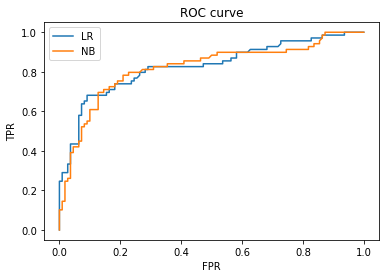

In [124]:
plt.plot(fpr,tpr)
plt.plot(fpr_nb,tpr_nb)

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend(['LR','NB'])
print('Area under the curve LR: ',roc_auc_score(y_test,y_pred_soft[:,1]))
print('Area under the curve NB: ',roc_auc_score(y_test,y_pred_nb_soft[:,1]))

plt.show()

# Descision Tree

In [125]:
from sklearn.tree import DecisionTreeClassifier

In [126]:
model_dt = DecisionTreeClassifier()

In [127]:
param = {'criterion':['gini','entropy'],
        'max_depth':[3,4,5,6]}

In [128]:
gscv = GridSearchCV(estimator=model_dt,
                   param_grid=param,
                   scoring='accuracy',
                   verbose=3)

In [129]:
gscv.fit(x_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .......criterion=gini, max_depth=3;, score=0.811 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=3;, score=0.804 total time=   0.0s
[CV 3/5] END .......criterion=gini, max_depth=3;, score=0.789 total time=   0.0s
[CV 4/5] END .......criterion=gini, max_depth=3;, score=0.768 total time=   0.0s
[CV 5/5] END .......criterion=gini, max_depth=3;, score=0.803 total time=   0.0s
[CV 1/5] END .......criterion=gini, max_depth=4;, score=0.825 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=4;, score=0.811 total time=   0.0s
[CV 3/5] END .......criterion=gini, max_depth=4;, score=0.803 total time=   0.0s
[CV 4/5] END .......criterion=gini, max_depth=4;, score=0.803 total time=   0.0s
[CV 5/5] END .......criterion=gini, max_depth=4;, score=0.810 total time=   0.0s
[CV 1/5] END .......criterion=gini, max_depth=5;, score=0.818 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=5;,

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6]},
             scoring='accuracy', verbose=3)

In [130]:
gscv.best_score_

0.8131882202304738

In [131]:
gscv.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [132]:
x_train.shape

(712, 7)

In [133]:
model_dt = DecisionTreeClassifier(**gscv.best_params_)

In [134]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [135]:
model_dt.score(x_test,y_test)

0.8268156424581006

In [136]:
y_pred_dt = model_dt.predict(x_test)

In [137]:
validation(y_test,y_pred_dt)

confusion Matrix:
 [[98 12]
 [19 50]]
Acuracy: 0.8268156424581006
Recall: 0.7246376811594203
Precision: 0.8064516129032258
F1 Score: 0.7633587786259542


In [138]:
from sklearn import tree

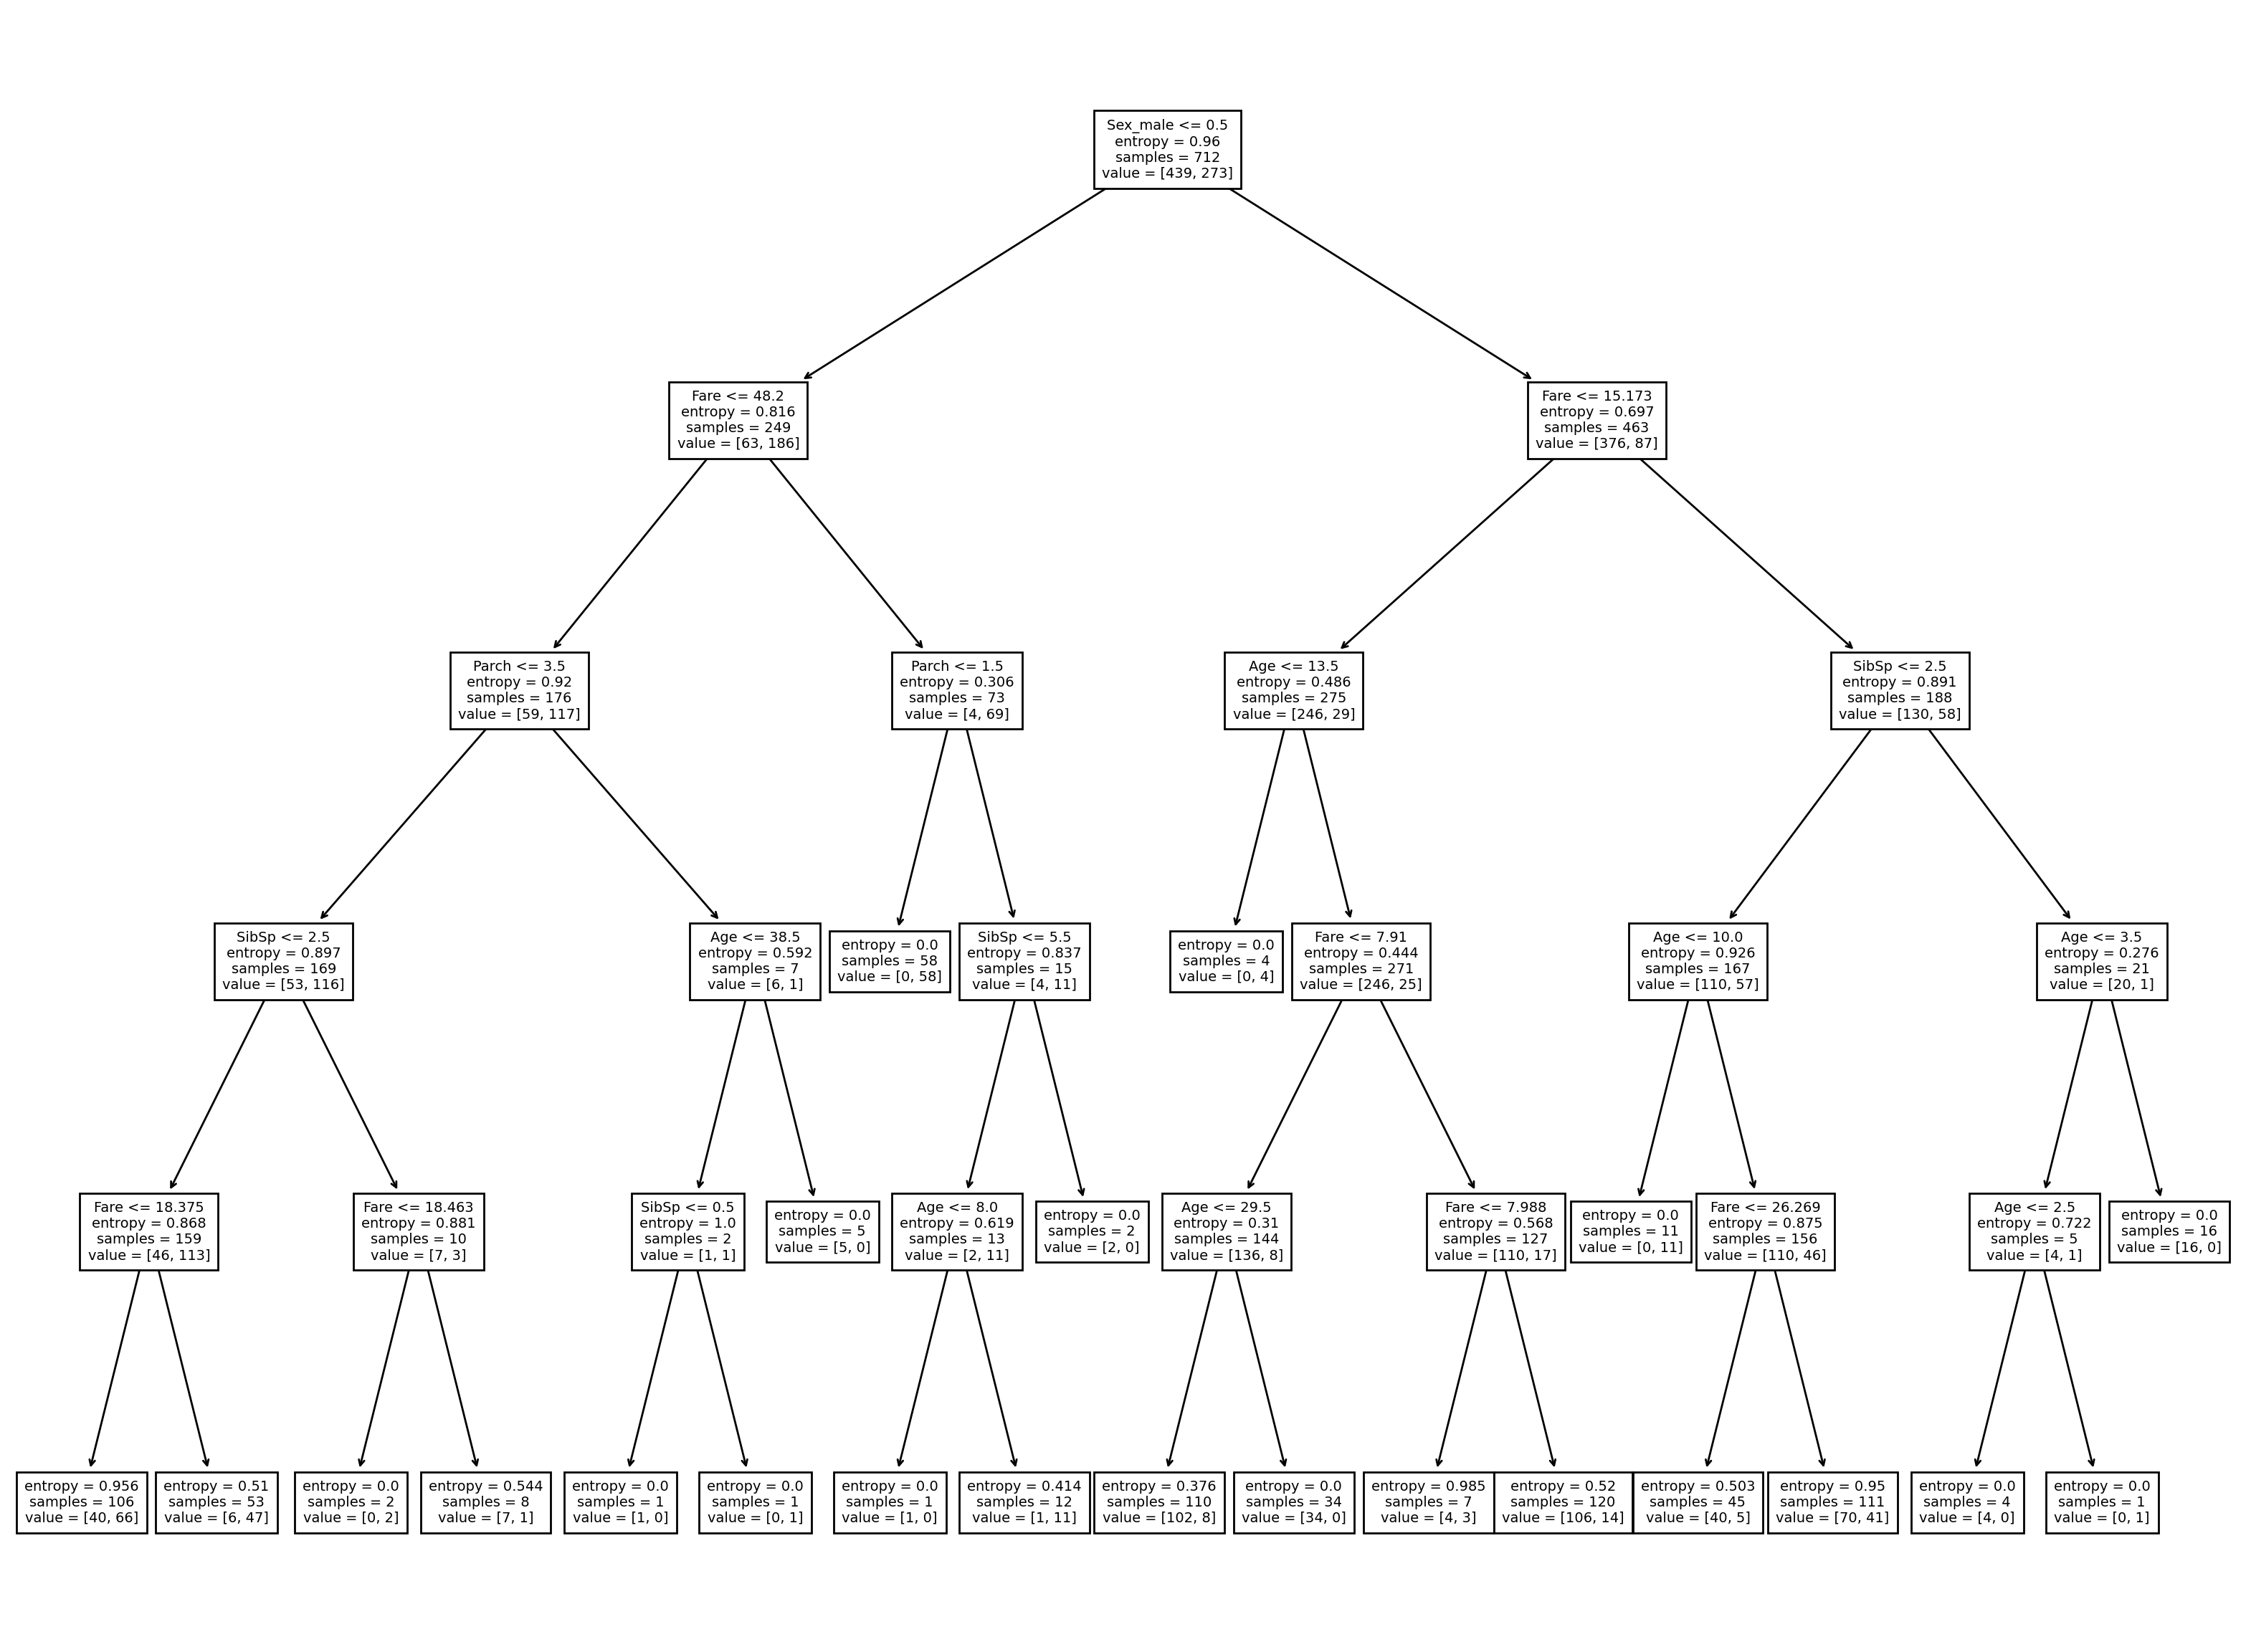

In [139]:
plt.figure(figsize=(20,15),dpi=200)
tree.plot_tree(model_dt,feature_names=x_train.columns,fontsize=7)
plt.show()

# Ensembles models
# bagging (Random Forest)

In [140]:
from sklearn.ensemble import RandomForestClassifier

In [141]:
model_rf = RandomForestClassifier()

In [142]:
param = {'n_estimators':[50,100,200,500],
        'criterion':['gini','entropy'],
        'max_depth':[3,4,5]}

In [143]:
gscv = GridSearchCV(estimator=model_rf,
                   param_grid=param,
                    cv=3,
                   scoring='accuracy',
                   verbose=3)

In [144]:
gscv.fit(x_train,y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3] END criterion=gini, max_depth=3, n_estimators=50;, score=0.824 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=3, n_estimators=50;, score=0.797 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=3, n_estimators=50;, score=0.797 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=3, n_estimators=100;, score=0.824 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=3, n_estimators=100;, score=0.797 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=3, n_estimators=100;, score=0.806 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=3, n_estimators=200;, score=0.824 total time=   0.1s
[CV 2/3] END criterion=gini, max_depth=3, n_estimators=200;, score=0.793 total time=   0.2s
[CV 3/3] END criterion=gini, max_depth=3, n_estimators=200;, score=0.806 total time=   0.1s
[CV 1/3] END criterion=gini, max_depth=3, n_estimators=500;, score=0.815 total time=   0.4s
[CV 2/3] END criterion

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 200, 500]},
             scoring='accuracy', verbose=3)

In [145]:
gscv.best_score_

0.8103806923613327

In [146]:
gscv.best_params_

{'criterion': 'gini', 'max_depth': 4, 'n_estimators': 200}

In [147]:
model_rf = RandomForestClassifier(**gscv.best_params_)

In [148]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=4, n_estimators=200)

In [149]:
y_pred_rf = model_rf.predict(x_test)

In [150]:
validation(y_test,y_pred_rf)

confusion Matrix:
 [[96 14]
 [19 50]]
Acuracy: 0.8156424581005587
Recall: 0.7246376811594203
Precision: 0.78125
F1 Score: 0.7518796992481203


In [151]:
model_rf.score(x_train,y_train)

0.827247191011236

# Boosting (ADA Boost)

In [152]:
from sklearn.ensemble import AdaBoostClassifier

In [153]:
model_ada = AdaBoostClassifier()

In [154]:
param = {'n_estimators':[50,100,200,350,500],
         'learning_rate':[0.001,.01,.1,1,10]}

In [155]:
gscv = GridSearchCV(estimator=model_ada,
                   param_grid=param,
                    cv=3,
                   scoring='f1',
                   verbose=3)

In [156]:
gscv.fit(x_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV 1/3] END learning_rate=0.001, n_estimators=50;, score=0.737 total time=   0.0s
[CV 2/3] END learning_rate=0.001, n_estimators=50;, score=0.705 total time=   0.0s
[CV 3/3] END learning_rate=0.001, n_estimators=50;, score=0.694 total time=   0.0s
[CV 1/3] END learning_rate=0.001, n_estimators=100;, score=0.737 total time=   0.0s
[CV 2/3] END learning_rate=0.001, n_estimators=100;, score=0.705 total time=   0.0s
[CV 3/3] END learning_rate=0.001, n_estimators=100;, score=0.694 total time=   0.0s
[CV 1/3] END learning_rate=0.001, n_estimators=200;, score=0.737 total time=   0.4s
[CV 2/3] END learning_rate=0.001, n_estimators=200;, score=0.705 total time=   0.2s
[CV 3/3] END learning_rate=0.001, n_estimators=200;, score=0.694 total time=   0.2s
[CV 1/3] END learning_rate=0.001, n_estimators=350;, score=0.737 total time=   0.3s
[CV 2/3] END learning_rate=0.001, n_estimators=350;, score=0.705 total time=   0.3s
[CV 3/3] END learn

GridSearchCV(cv=3, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 100, 200, 350, 500]},
             scoring='f1', verbose=3)

In [157]:
# import sklearn
#sorted(sklearn.metrics)

In [158]:
gscv.best_score_

0.7406646725087068

In [159]:
gscv.best_params_

{'learning_rate': 1, 'n_estimators': 200}

In [160]:
model_ada = AdaBoostClassifier(**gscv.best_params_)

In [161]:
model_ada.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=200)

In [162]:
y_pred_ada= model_ada.predict(x_test)

In [163]:
validation(y_test,y_pred_ada)

confusion Matrix:
 [[94 16]
 [17 52]]
Acuracy: 0.8156424581005587
Recall: 0.7536231884057971
Precision: 0.7647058823529411
F1 Score: 0.759124087591241


# Gradient Boosting

In [164]:
from sklearn.ensemble import GradientBoostingClassifier

In [165]:
model_gb = GradientBoostingClassifier()

In [166]:
param = {'n_estimators':[50,100,200,350,500],
         'learning_rate':[0.001,.01,0.1,1],
        'max_features':[3,4,5]}

In [167]:
gscv = GridSearchCV(estimator=model_gb,
                   param_grid=param,
                    cv=3,
                   scoring='accuracy',
                   verbose=3)

In [168]:
gscv.fit(x_train,y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV 1/3] END learning_rate=0.001, max_features=3, n_estimators=50;, score=0.618 total time=   0.0s
[CV 2/3] END learning_rate=0.001, max_features=3, n_estimators=50;, score=0.616 total time=   0.0s
[CV 3/3] END learning_rate=0.001, max_features=3, n_estimators=50;, score=0.616 total time=   0.0s
[CV 1/3] END learning_rate=0.001, max_features=3, n_estimators=100;, score=0.618 total time=   0.0s
[CV 2/3] END learning_rate=0.001, max_features=3, n_estimators=100;, score=0.616 total time=   0.0s
[CV 3/3] END learning_rate=0.001, max_features=3, n_estimators=100;, score=0.616 total time=   0.0s
[CV 1/3] END learning_rate=0.001, max_features=3, n_estimators=200;, score=0.618 total time=   0.0s
[CV 2/3] END learning_rate=0.001, max_features=3, n_estimators=200;, score=0.616 total time=   0.0s
[CV 3/3] END learning_rate=0.001, max_features=3, n_estimators=200;, score=0.616 total time=   0.0s
[CV 1/3] END learning_rate=0.001, max_fea

[CV 2/3] END learning_rate=0.01, max_features=5, n_estimators=200;, score=0.789 total time=   0.0s
[CV 3/3] END learning_rate=0.01, max_features=5, n_estimators=200;, score=0.802 total time=   0.1s
[CV 1/3] END learning_rate=0.01, max_features=5, n_estimators=350;, score=0.824 total time=   0.2s
[CV 2/3] END learning_rate=0.01, max_features=5, n_estimators=350;, score=0.785 total time=   0.2s
[CV 3/3] END learning_rate=0.01, max_features=5, n_estimators=350;, score=0.802 total time=   0.1s
[CV 1/3] END learning_rate=0.01, max_features=5, n_estimators=500;, score=0.811 total time=   0.3s
[CV 2/3] END learning_rate=0.01, max_features=5, n_estimators=500;, score=0.776 total time=   0.3s
[CV 3/3] END learning_rate=0.01, max_features=5, n_estimators=500;, score=0.806 total time=   0.2s
[CV 1/3] END learning_rate=0.1, max_features=3, n_estimators=50;, score=0.803 total time=   0.0s
[CV 2/3] END learning_rate=0.1, max_features=3, n_estimators=50;, score=0.793 total time=   0.0s
[CV 3/3] END l

[CV 1/3] END learning_rate=1, max_features=5, n_estimators=100;, score=0.807 total time=   0.0s
[CV 2/3] END learning_rate=1, max_features=5, n_estimators=100;, score=0.789 total time=   0.0s
[CV 3/3] END learning_rate=1, max_features=5, n_estimators=100;, score=0.772 total time=   0.0s
[CV 1/3] END learning_rate=1, max_features=5, n_estimators=200;, score=0.811 total time=   0.1s
[CV 2/3] END learning_rate=1, max_features=5, n_estimators=200;, score=0.785 total time=   0.1s
[CV 3/3] END learning_rate=1, max_features=5, n_estimators=200;, score=0.768 total time=   0.1s
[CV 1/3] END learning_rate=1, max_features=5, n_estimators=350;, score=0.786 total time=   0.2s
[CV 2/3] END learning_rate=1, max_features=5, n_estimators=350;, score=0.759 total time=   0.2s
[CV 3/3] END learning_rate=1, max_features=5, n_estimators=350;, score=0.764 total time=   0.2s
[CV 1/3] END learning_rate=1, max_features=5, n_estimators=500;, score=0.803 total time=   0.4s
[CV 2/3] END learning_rate=1, max_featur

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'max_features': [3, 4, 5],
                         'n_estimators': [50, 100, 200, 350, 500]},
             scoring='accuracy', verbose=3)

In [169]:
gscv.best_score_

0.8089624035268116

In [170]:
gscv.best_params_

{'learning_rate': 0.01, 'max_features': 3, 'n_estimators': 200}

In [171]:
model_gb = GradientBoostingClassifier(**gscv.best_params_)

In [172]:
model_gb.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, max_features=3, n_estimators=200)

In [173]:
y_pred_gb =model_gb.predict(x_test)

In [174]:
validation(y_test,y_pred_gb)

confusion Matrix:
 [[98 12]
 [20 49]]
Acuracy: 0.8212290502793296
Recall: 0.7101449275362319
Precision: 0.8032786885245902
F1 Score: 0.7538461538461538


## XGBoost

In [175]:
pip install xgboost

In [176]:
from xgboost import XGBClassifier

In [177]:
model_xgb = XGBClassifier(eval_metric= 'logloss')

In [178]:
param = {'n_estimators':[50,100,200,350,500],
         'learning_rate':[0.001,.01,0.1,1],
         
        'max_depth':[4,5,6,7]}

In [179]:
gscv = GridSearchCV(estimator=model_xgb,
                   param_grid=param,
                    cv=3,
                   scoring='accuracy',
                   verbose=3)

In [180]:
gscv.fit(x_train,y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits
[CV 1/3] END learning_rate=0.001, max_depth=4, n_estimators=50;, score=0.819 total time=   0.0s
[CV 2/3] END learning_rate=0.001, max_depth=4, n_estimators=50;, score=0.797 total time=   0.0s
[CV 3/3] END learning_rate=0.001, max_depth=4, n_estimators=50;, score=0.776 total time=   0.0s
[CV 1/3] END learning_rate=0.001, max_depth=4, n_estimators=100;, score=0.819 total time=   0.0s
[CV 2/3] END learning_rate=0.001, max_depth=4, n_estimators=100;, score=0.797 total time=   0.0s
[CV 3/3] END learning_rate=0.001, max_depth=4, n_estimators=100;, score=0.776 total time=   0.0s
[CV 1/3] END learning_rate=0.001, max_depth=4, n_estimators=200;, score=0.819 total time=   0.1s
[CV 2/3] END learning_rate=0.001, max_depth=4, n_estimators=200;, score=0.797 total time=   0.4s
[CV 3/3] END learning_rate=0.001, max_depth=4, n_estimators=200;, score=0.781 total time=   0.3s
[CV 1/3] END learning_rate=0.001, max_depth=4, n_estimators=350;, sc

[CV 2/3] END learning_rate=0.01, max_depth=5, n_estimators=350;, score=0.793 total time=   0.5s
[CV 3/3] END learning_rate=0.01, max_depth=5, n_estimators=350;, score=0.785 total time=   0.6s
[CV 1/3] END learning_rate=0.01, max_depth=5, n_estimators=500;, score=0.819 total time=   0.8s
[CV 2/3] END learning_rate=0.01, max_depth=5, n_estimators=500;, score=0.781 total time=   0.8s
[CV 3/3] END learning_rate=0.01, max_depth=5, n_estimators=500;, score=0.785 total time=   0.9s
[CV 1/3] END learning_rate=0.01, max_depth=6, n_estimators=50;, score=0.773 total time=   0.0s
[CV 2/3] END learning_rate=0.01, max_depth=6, n_estimators=50;, score=0.797 total time=   0.0s
[CV 3/3] END learning_rate=0.01, max_depth=6, n_estimators=50;, score=0.793 total time=   0.0s
[CV 1/3] END learning_rate=0.01, max_depth=6, n_estimators=100;, score=0.815 total time=   0.1s
[CV 2/3] END learning_rate=0.01, max_depth=6, n_estimators=100;, score=0.793 total time=   0.1s
[CV 3/3] END learning_rate=0.01, max_depth=

[CV 2/3] END learning_rate=0.1, max_depth=7, n_estimators=200;, score=0.789 total time=   0.0s
[CV 3/3] END learning_rate=0.1, max_depth=7, n_estimators=200;, score=0.755 total time=   0.5s
[CV 1/3] END learning_rate=0.1, max_depth=7, n_estimators=350;, score=0.790 total time=   0.7s
[CV 2/3] END learning_rate=0.1, max_depth=7, n_estimators=350;, score=0.793 total time=   0.1s
[CV 3/3] END learning_rate=0.1, max_depth=7, n_estimators=350;, score=0.747 total time=   0.2s
[CV 1/3] END learning_rate=0.1, max_depth=7, n_estimators=500;, score=0.786 total time=   0.3s
[CV 2/3] END learning_rate=0.1, max_depth=7, n_estimators=500;, score=0.789 total time=   0.2s
[CV 3/3] END learning_rate=0.1, max_depth=7, n_estimators=500;, score=0.747 total time=   0.2s
[CV 1/3] END learning_rate=1, max_depth=4, n_estimators=50;, score=0.807 total time=   0.0s
[CV 2/3] END learning_rate=1, max_depth=4, n_estimators=50;, score=0.806 total time=   0.0s
[CV 3/3] END learning_rate=1, max_depth=4, n_estimators=

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     m...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'max_depth': [4, 5, 6, 7],
                         'n_estimators': [50, 100, 200, 350, 500]},
             scoring='accuracy', verbose=3)

In [181]:
gscv.best_score_

0.8117930716590434

In [182]:
gscv.best_params_

{'learning_rate': 0.001, 'max_depth': 5, 'n_estimators': 50}

In [183]:
model_xgb = XGBClassifier(**gscv.best_params_)

In [184]:
model_xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.001, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [185]:
y_pred_xgb= model_xgb.predict(x_test)

In [186]:
validation(y_test,y_pred_xgb)

confusion Matrix:
 [[97 13]
 [17 52]]
Acuracy: 0.8324022346368715
Recall: 0.7536231884057971
Precision: 0.8
F1 Score: 0.7761194029850746


# KNN

In [187]:
from sklearn.neighbors import KNeighborsClassifier

In [188]:
model_knn = KNeighborsClassifier(n_neighbors=7)

In [189]:
# standard scaling
from sklearn.preprocessing import StandardScaler

In [190]:
sc = StandardScaler()

In [191]:
x_train_s = sc.fit_transform(x_train)
x_test_s = sc.fit_transform(x_test)

In [192]:
pd.DataFrame(x_test_s,columns=x_train.columns)

,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,-0.023721,-0.484354,-0.532986,-0.655377,0.755100,-0.323942,0.570899
1,1.461187,0.382640,3.803585,0.343889,-1.324329,-0.323942,0.570899
2,-0.101874,1.249633,-0.532986,-0.138029,0.755100,-0.323942,-1.751623
3,-0.101874,0.382640,2.358061,-0.070811,0.755100,-0.323942,0.570899
4,-0.727098,-0.484354,-0.532986,-0.632127,-1.324329,-0.323942,0.570899
...,...,...,...,...,...,...,...
174,-0.101874,6.451593,2.358061,1.679089,0.755100,-0.323942,0.570899
175,-0.414486,-0.484354,-0.532986,-0.693336,0.755100,-0.323942,0.570899
176,-0.648945,-0.484354,-0.532986,-0.685744,0.755100,-0.323942,0.570899
177,-0.805252,-0.484354,-0.532986,-0.574874,0.755100,-0.323942,0.570899


In [193]:
model_knn.fit(x_train_s,y_train)

KNeighborsClassifier(n_neighbors=7)

In [194]:
y_pred_knn = model_knn.predict(x_test_s)

In [195]:
validation(y_test,y_pred_knn)

confusion Matrix:
 [[91 19]
 [18 51]]
Acuracy: 0.7932960893854749
Recall: 0.7391304347826086
Precision: 0.7285714285714285
F1 Score: 0.7338129496402879


# Support vector Machine

In [196]:
from sklearn.svm import SVC

In [197]:
model_svc = SVC()

In [198]:
params = {'C':[0.001,0.01,0.1,1],
         'kernel':['linear','poly','rbf','sigmoid'],
          'gamma':[0.001,0.01,0.1,1]}

In [199]:
from sklearn.model_selection import GridSearchCV

In [200]:
gscv = GridSearchCV(estimator=model_svc,
                   param_grid=params,
                   cv=3,
                   scoring='accuracy',
                   verbose=3)

In [201]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [202]:
x_train_s = sc.fit_transform(x_train)
x_test_s = sc.fit_transform(x_test)

In [203]:
gscv.fit(x_train_s,y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV 1/3] END C=0.001, gamma=0.001, kernel=linear;, score=0.618 total time=   0.0s
[CV 2/3] END C=0.001, gamma=0.001, kernel=linear;, score=0.616 total time=   0.0s
[CV 3/3] END C=0.001, gamma=0.001, kernel=linear;, score=0.616 total time=   0.0s
[CV 1/3] END .C=0.001, gamma=0.001, kernel=poly;, score=0.618 total time=   0.0s
[CV 2/3] END .C=0.001, gamma=0.001, kernel=poly;, score=0.616 total time=   0.0s
[CV 3/3] END .C=0.001, gamma=0.001, kernel=poly;, score=0.616 total time=   0.0s
[CV 1/3] END ..C=0.001, gamma=0.001, kernel=rbf;, score=0.618 total time=   0.0s
[CV 2/3] END ..C=0.001, gamma=0.001, kernel=rbf;, score=0.616 total time=   0.0s
[CV 3/3] END ..C=0.001, gamma=0.001, kernel=rbf;, score=0.616 total time=   0.0s
[CV 1/3] END C=0.001, gamma=0.001, kernel=sigmoid;, score=0.618 total time=   0.0s
[CV 2/3] END C=0.001, gamma=0.001, kernel=sigmoid;, score=0.616 total time=   0.0s
[CV 3/3] END C=0.001, gamma=0.001, kerne

[CV 2/3] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.616 total time=   0.0s
[CV 3/3] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.616 total time=   0.0s
[CV 1/3] END C=0.1, gamma=0.001, kernel=sigmoid;, score=0.618 total time=   0.0s
[CV 2/3] END C=0.1, gamma=0.001, kernel=sigmoid;, score=0.616 total time=   0.0s
[CV 3/3] END C=0.1, gamma=0.001, kernel=sigmoid;, score=0.616 total time=   0.0s
[CV 1/3] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.803 total time=   0.0s
[CV 2/3] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.785 total time=   0.0s
[CV 3/3] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.781 total time=   0.0s
[CV 1/3] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.618 total time=   0.0s
[CV 2/3] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.616 total time=   0.0s
[CV 3/3] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.616 total time=   0.0s
[CV 1/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.647 total time=   0.0s
[CV 2/3] END .....C=0.1, gam

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1],
                         'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy', verbose=3)

In [204]:
gscv.best_score_

0.8188017823163021

In [205]:
gscv.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [206]:
model_svc = SVC(**gscv.best_params_)

In [207]:
model_svc.fit(x_train_s,y_train)

SVC(C=1, gamma=0.1)

In [208]:
y_pred_svm = model_svc.predict(x_test_s)

In [209]:
validation(y_test,y_pred_svm)

confusion Matrix:
 [[100  10]
 [ 19  50]]
Acuracy: 0.8379888268156425
Recall: 0.7246376811594203
Precision: 0.8333333333333334
F1 Score: 0.7751937984496124
